In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# cdc_csv = "Covid-19_Case_Surveillance_Public_Use_Data.csv"
# cdc_df = pd.read_csv(cdc_csv)

# cdc_df.head(2)

us_vac_csv = "Resource/us_state_vaccinations.csv"
us_vac_df = pd.read_csv(us_vac_csv)
us_vac_df.head(2)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.44,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.52,7.73,5906.0,5906.0,1205.0,0.222


In [3]:
us_vac_df.columns

Index(['date', 'location', 'total_vaccinations', 'total_distributed',
       'people_vaccinated', 'people_fully_vaccinated_per_hundred',
       'total_vaccinations_per_hundred', 'people_fully_vaccinated',
       'people_vaccinated_per_hundred', 'distributed_per_hundred',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'daily_vaccinations_per_million', 'share_doses_used'],
      dtype='object')

In [4]:
total_df = us_vac_df[['date','location', 'total_vaccinations', 'total_distributed','total_vaccinations_per_hundred','distributed_per_hundred' ]]
total_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
1,2021-01-13,Alabama,84040.0,378975.0,1.71,7.73
2,2021-01-14,Alabama,92300.0,435350.0,1.88,8.88
3,2021-01-15,Alabama,100567.0,444650.0,2.05,9.07
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0,23.44,26.07
3009,2021-02-23,Wyoming,136163.0,167025.0,23.53,28.86
3010,2021-02-24,Wyoming,136366.0,172465.0,23.56,29.80
3011,2021-02-25,Wyoming,141545.0,183065.0,24.46,31.63


In [5]:
no_null_total_df = total_df.dropna(how='any')
no_null_total_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
1,2021-01-13,Alabama,84040.0,378975.0,1.71,7.73
2,2021-01-14,Alabama,92300.0,435350.0,1.88,8.88
3,2021-01-15,Alabama,100567.0,444650.0,2.05,9.07
7,2021-01-19,Alabama,130795.0,444650.0,2.67,9.07
...,...,...,...,...,...,...
3008,2021-02-22,Wyoming,135635.0,150905.0,23.44,26.07
3009,2021-02-23,Wyoming,136163.0,167025.0,23.53,28.86
3010,2021-02-24,Wyoming,136366.0,172465.0,23.56,29.80
3011,2021-02-25,Wyoming,141545.0,183065.0,24.46,31.63


In [6]:
no_null_total_df[(no_null_total_df["date"]=="2021-01-12")|(no_null_total_df["date"]=="2021-01-19")|(no_null_total_df["date"]=="2021-01-26")|(no_null_total_df["date"]=="2021-02-02")|(no_null_total_df["date"]=="2021-02-09")|(no_null_total_df["date"]=="2021-02-16")|(no_null_total_df["date"]=="2021-02-23")]

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
7,2021-01-19,Alabama,130795.0,444650.0,2.67,9.07
14,2021-01-26,Alabama,254959.0,569000.0,5.20,11.60
21,2021-02-02,Alabama,371882.0,680550.0,7.58,13.88
28,2021-02-09,Alabama,490969.0,823600.0,10.01,16.80
...,...,...,...,...,...,...
2981,2021-01-26,Wyoming,41339.0,71725.0,7.14,12.39
2988,2021-02-02,Wyoming,59018.0,89450.0,10.20,15.46
2995,2021-02-09,Wyoming,76457.0,113175.0,13.21,19.56
3002,2021-02-16,Wyoming,100186.0,122200.0,17.31,21.11


In [7]:
jan_12_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-12")]
jan_12_df

,date,location,total_vaccinations,total_distributed,total_vaccinations_per_hundred,distributed_per_hundred
0,2021-01-12,Alabama,78134.0,377025.0,1.59,7.69
46,2021-01-12,Alaska,35838.0,141600.0,4.90,19.36
92,2021-01-12,American Samoa,2124.0,10650.0,3.81,19.12
138,2021-01-12,Arizona,141355.0,563025.0,1.94,7.74
184,2021-01-12,Arkansas,40879.0,274400.0,1.36,9.09
276,2021-01-12,California,816301.0,3286050.0,2.07,8.32
322,2021-01-12,Colorado,224428.0,516750.0,3.90,8.97
368,2021-01-12,Connecticut,151395.0,250775.0,4.25,7.03
414,2021-01-12,Delaware,26410.0,88325.0,2.71,9.07
506,2021-01-12,District of Columbia,29812.0,62725.0,4.22,8.89


In [8]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
jan_12_df=jan_12_df[~jan_12_df.location.isin(nots)]

In [9]:
x_axis = np.arange(len(jan_12_df)) 
tick_locations = [value for value in x_axis]


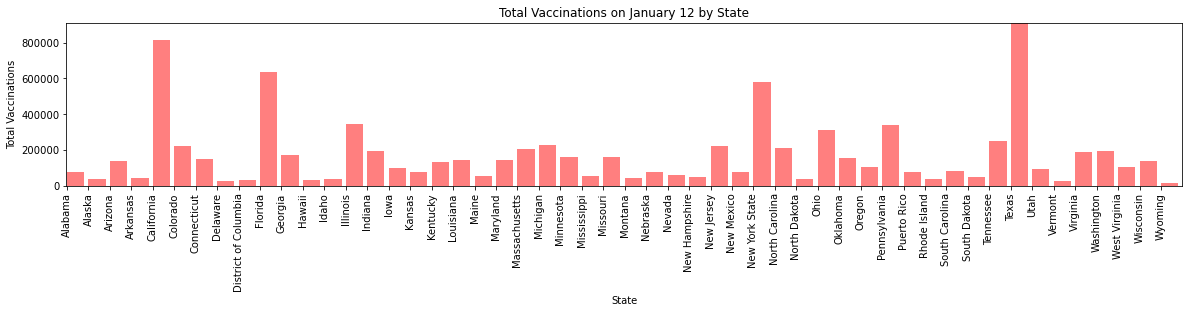

<Figure size 432x288 with 0 Axes>

In [39]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_12_df ["total_vaccinations_per_hundred"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_12_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on January 12 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
 # Save our graph and show the grap
plt.tight_layout()
plt.savefig("./Images/vjan_12.png")

In [40]:
jan_19_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-19")]
jan_19_df

,date,location,total_vaccinations,total_distributed
7,2021-01-19,Alabama,130795.0,444650.0
53,2021-01-19,Alaska,66331.0,150450.0
99,2021-01-19,American Samoa,4756.0,18450.0
145,2021-01-19,Arizona,266276.0,571725.0
191,2021-01-19,Arkansas,142337.0,297800.0
...,...,...,...,...
2790,2021-01-19,Virginia,326894.0,852725.0
2836,2021-01-19,Washington,321200.0,696175.0
2882,2021-01-19,West Virginia,152657.0,205475.0
2928,2021-01-19,Wisconsin,213498.0,437900.0


In [41]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
jan_19_df=jan_19_df[jan_19_df["location"]!="United States"]
jan_19_df=jan_19_df[~jan_19_df.location.isin(nots)]

In [42]:
x_axis = np.arange(len(jan_19_df)) 
tick_locations = [value for value in x_axis]

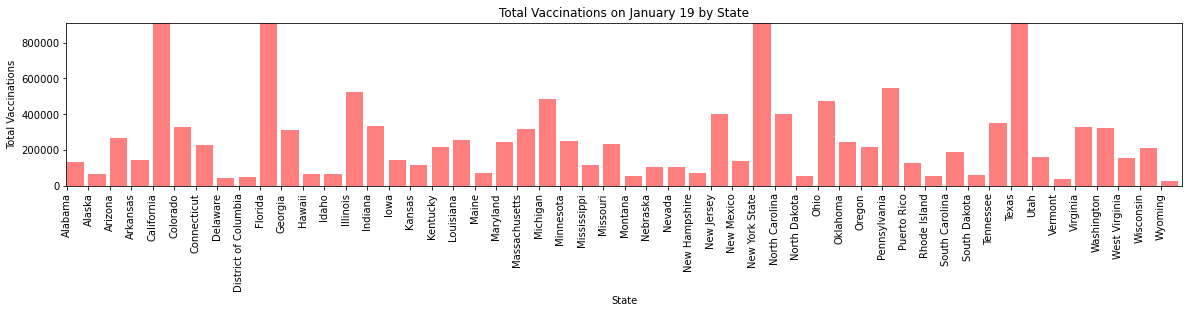

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_19_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_19_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on January 19 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("./Images/vjan_19.png")

In [44]:
jan_26_df=no_null_total_df[(no_null_total_df["date"]=="2021-01-26")]
jan_26_df

,date,location,total_vaccinations,total_distributed
14,2021-01-26,Alabama,254959.0,569000.0
60,2021-01-26,Alaska,98149.0,162925.0
106,2021-01-26,American Samoa,8315.0,18450.0
152,2021-01-26,Arizona,430892.0,837200.0
198,2021-01-26,Arkansas,236290.0,394775.0
...,...,...,...,...
2797,2021-01-26,Virginia,594828.0,1172375.0
2843,2021-01-26,Washington,507610.0,960800.0
2889,2021-01-26,West Virginia,210492.0,278400.0
2935,2021-01-26,Wisconsin,318096.0,685100.0


In [45]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
jan_26_df=jan_26_df[jan_26_df["location"]!="United States"]
jan_26_df=jan_26_df[~jan_26_df.location.isin(nots)]

In [46]:
x_axis = np.arange(len(jan_26_df)) 
tick_locations = [value for value in x_axis]

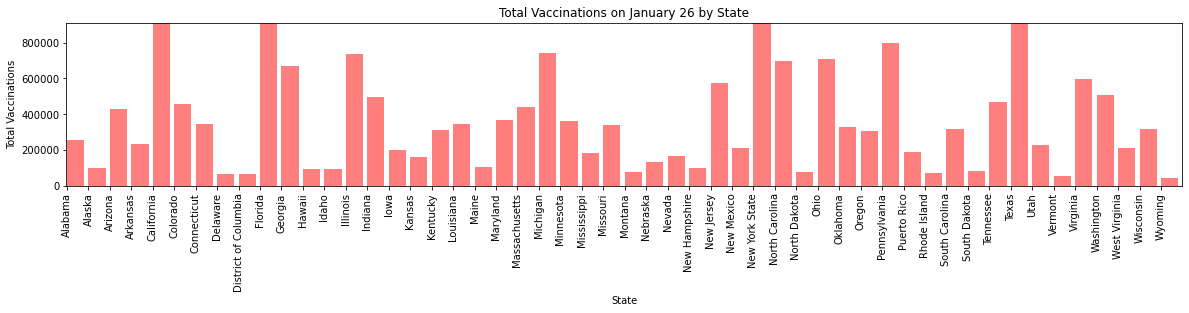

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,jan_26_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, jan_26_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(jan_12_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on January 26 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("./Images/vjan_26.png")

In [48]:
Feb_02_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-02")]
Feb_02_df

,date,location,total_vaccinations,total_distributed
21,2021-02-02,Alabama,371882.0,680550.0
67,2021-02-02,Alaska,123443.0,196975.0
113,2021-02-02,American Samoa,10761.0,18450.0
159,2021-02-02,Arizona,631662.0,1082050.0
205,2021-02-02,Arkansas,314470.0,467800.0
...,...,...,...,...
2804,2021-02-02,Virginia,901213.0,1306800.0
2850,2021-02-02,Washington,741769.0,1129025.0
2896,2021-02-02,West Virginia,264205.0,325100.0
2942,2021-02-02,Wisconsin,522034.0,900250.0


In [49]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_02_df=Feb_02_df[~Feb_02_df.location.isin(nots)]

In [50]:
x_axis = np.arange(len(Feb_02_df)) 
tick_locations = [value for value in x_axis]

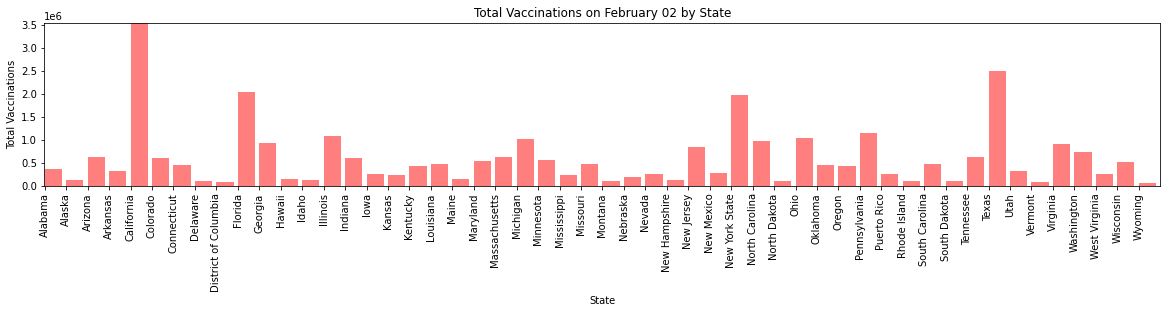

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_02_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_02_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_02_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 02 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("./Images/vfeb_02.png")

In [52]:
Feb_09_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-09")]
Feb_09_df

,date,location,total_vaccinations,total_distributed
28,2021-02-09,Alabama,490969.0,823600.0
74,2021-02-09,Alaska,152874.0,256900.0
120,2021-02-09,American Samoa,12680.0,29450.0
166,2021-02-09,Arizona,863807.0,1265950.0
212,2021-02-09,Arkansas,404127.0,580775.0
...,...,...,...,...
2811,2021-02-09,Virginia,1161590.0,1544150.0
2857,2021-02-09,Washington,951204.0,1364750.0
2903,2021-02-09,West Virginia,327414.0,380400.0
2949,2021-02-09,Wisconsin,769314.0,1045950.0


In [53]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_09_df=Feb_09_df[~Feb_09_df.location.isin(nots)]

In [54]:
x_axis = np.arange(len(Feb_09_df)) 
tick_locations = [value for value in x_axis]

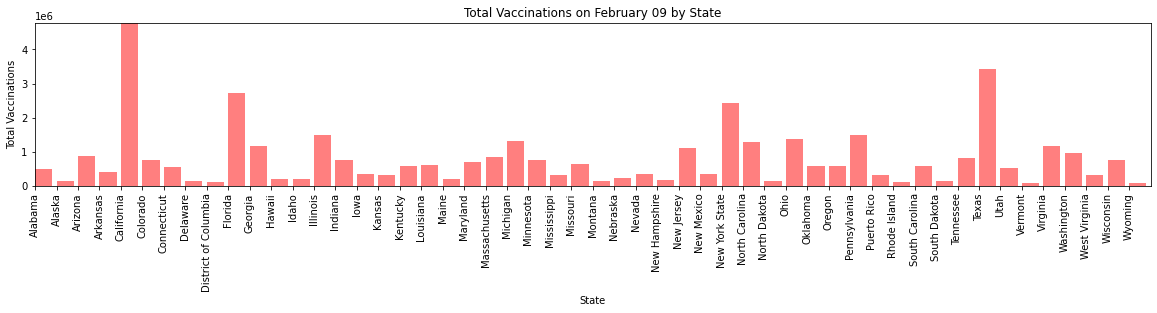

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_09_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_09_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_09_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 09 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("./Images/vfeb_09.png")

In [56]:
Feb_16_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-16")]
Feb_16_df

,date,location,total_vaccinations,total_distributed
35,2021-02-16,Alabama,636682.0,1015775.0
81,2021-02-16,Alaska,191008.0,271550.0
127,2021-02-16,American Samoa,16109.0,29450.0
173,2021-02-16,Arizona,1154583.0,1396475.0
219,2021-02-16,Arkansas,483438.0,631675.0
...,...,...,...,...
2818,2021-02-16,Virginia,1431501.0,1648500.0
2864,2021-02-16,Washington,1201284.0,1453425.0
2910,2021-02-16,West Virginia,393643.0,429800.0
2956,2021-02-16,Wisconsin,991691.0,1223525.0


In [57]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_16_df=Feb_16_df[~Feb_16_df.location.isin(nots)]

In [58]:
x_axis = np.arange(len(Feb_16_df)) 
tick_locations = [value for value in x_axis]

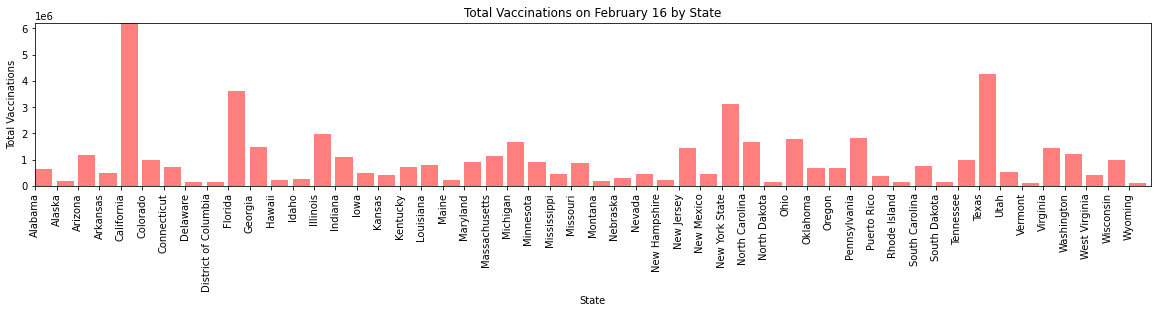

<Figure size 432x288 with 0 Axes>

In [59]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_16_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_16_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 16 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("./Images/vfeb_16.png")

In [60]:
Feb_23_df=no_null_total_df[(no_null_total_df["date"]=="2021-02-23")]
Feb_23_df

,date,location,total_vaccinations,total_distributed
42,2021-02-23,Alabama,815108.0,1084440.0
88,2021-02-23,Alaska,239927.0,304875.0
134,2021-02-23,American Samoa,18816.0,29450.0
180,2021-02-23,Arizona,1525794.0,1755635.0
226,2021-02-23,Arkansas,540192.0,794230.0
...,...,...,...,...
2825,2021-02-23,Virginia,1765927.0,2283165.0
2871,2021-02-23,Washington,1493572.0,1920320.0
2917,2021-02-23,West Virginia,470643.0,512865.0
2963,2021-02-23,Wisconsin,1259647.0,1401205.0


In [61]:
nots = ["United States", "Long Term Care", "Bureau of Prisons", "Dept of Defense", "Federated States of Micronesia", "American Samoa" , "Guam", "Indian Health Svc", "Marshall Islands", "Northern Mariana Islands", "Republic of Palau", "Veterans Health","Virgin Islands"]
Feb_23_df=Feb_23_df[~Feb_23_df.location.isin(nots)]

In [62]:
x_axis = np.arange(len(Feb_23_df)) 
tick_locations = [value for value in x_axis]

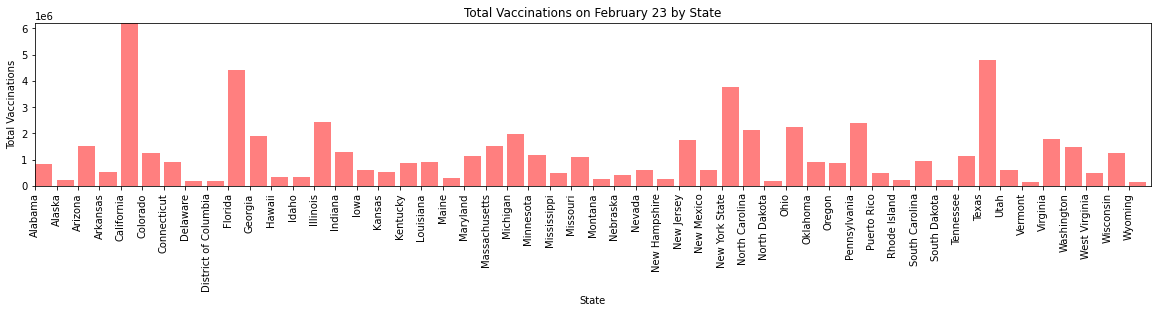

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure(figsize=(20,3))
plt.bar(x_axis,Feb_23_df ["total_vaccinations"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, Feb_23_df["location"].values, rotation="vertical")
plt.xlim(-.025, len(x_axis))
plt.ylim(0, max(Feb_16_df["total_vaccinations"])+10)
plt.title("Total Vaccinations on February 23 by State")
plt.xlabel("State")
plt.ylabel("Total Vaccinations")
#plt.tight_layout()
plt.show()
plt.tight_layout()
plt.savefig("./Images/vfeb_23.png")